# Pandas 動手玩
## 倪鈵斯
Less Loop, More Efficiency

# About Me
* 大三學長
* 資料分析有興趣，找老師做研究
* 丟給我很多有趣的東西，like Pandas

# 什麼是Pandas
* 高效能的資料處理套件

# 與其他工具比較
## Pandas vs Excel
* 可以處理較大的資料
* 上手之後很多事情都可以一行解決

## Pandas vs Database
* 比較輕量

## Pandas vs Pure Python

In [1]:
import numpy as np
import pandas as pd

sample_series = pd.Series(np.random.sample(1000000))
sample_list = list(np.random.sample(1000000))

In [6]:
%timeit sample_series+sample_series

1000 loops, best of 3: 1.58 ms per loop


In [7]:
%timeit [i+i for i in sample_list]

10 loops, best of 3: 85.6 ms per loop


## 總結
* Pandas適合處理中型的資料
* Pandas很快

# Take a Look

In [7]:
import pandas

series = pandas.Series([160, 155, 170], index=['王小明', '陳大頭', '謝黑客'])
df = pandas.DataFrame({
        '身高': series,
        '學校': '台灣科技大學'
    })

In [8]:
series

王小明    160
陳大頭    155
謝黑客    170
dtype: int64

In [9]:
df

,學校,身高
王小明,台灣科技大學,160
陳大頭,台灣科技大學,155
謝黑客,台灣科技大學,170


## 引用模組的其他方式

### 別名

In [10]:
import pandas as pd

series = pd.Series([160, 155, 170], index=['王小明', '陳大頭', '謝黑客'])
df = pd.DataFrame({
        '身高': series,
        '學校': '台灣科技大學'
    })

### 只引入要用的東西

In [11]:
from pandas import Series, DataFrame

series = Series([160, 155, 170], index=['王小明', '陳大頭', '謝黑客'])
df = DataFrame({
        '身高': series,
        '學校': '台灣科技大學'
    })

In [12]:
# Import the IPython display module
from IPython.display import IFrame
IFrame('/notebooks/python-course/playground.ipynb', width=900, height=500)

# 使用Pandas不可不知的兩種資料型態（類別）
* Series
* Dataframe


# Series（序列）簡介
### Series vs List
* 同：群集資料型態、有序的
* 異：同一個Series只能是相同型態的物件


| 類別| 舉例| 
|-|-|
|list|[1, 0.5, 'str', ['ntust']]]|
|Series|pd.Series([1, 2, 3, 4, 5])|




In [85]:
list_ = ['✈', 9**3,  "ob'_'bv", {}]
print(list_)
print(list_[2:])

['✈', 729, "ob'_'bv", {}]
["ob'_'bv", {}]


In [86]:
series = pd.Series(['✈', 9**3,  "ob'_'bv", {}])
print(series[2:])
print(series.astype('int64').dtype)

2    ob'_'bv
3         {}
dtype: object
object


ValueError: invalid literal for int() with base 10: '✈'

# 操作Series

## Series的取值
* Series是有序的

In [90]:
series = pd.Series([1, 2, 3, 4, 5])

In [91]:
series[3]

4

In [92]:
series[3:]

3    4
4    5
dtype: int64

In [94]:
series[0] = 0
series

0    0
1    2
2    3
3    4
4    5
dtype: int64

## 加強版的取值

In [98]:
成績 = pd.Series([55, 40, 30, 10, 99])

In [100]:
成績 > 60

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [101]:
成績[成績 > 60]

4    99
dtype: int64

## Series的運算

In [102]:
成績 = pd.Series([55, 40, 30, 10, 99])

In [103]:
print(成績+10)
print(成績*0.3)
print(成績**0.5*10)

0     65
1     50
2     40
3     20
4    109
dtype: int64
0    16.5
1    12.0
2     9.0
3     3.0
4    29.7
dtype: float64
0    74.161985
1    63.245553
2    54.772256
3    31.622777
4    99.498744
dtype: float64


# 現在你看懂了嗎？

In [2]:
import numpy as np
import pandas as pd

sample_series = pd.Series(np.random.sample(1000000))
sample_list = list(np.random.sample(1000000))

In [3]:
%timeit sample_series+sample_series

100 loops, best of 3: 1.89 ms per loop


In [4]:
%timeit [i+i for i in sample_list]

10 loops, best of 3: 95.7 ms per loop


In [12]:
# Import the IPython display module
from IPython.display import IFrame
IFrame('/notebooks/python-course/playground.ipynb', width=900, height=500)

也可以跟另外一個相加減乘除！

# Series也有不擅長的地方

* Series缺乏延展性，一旦建立就無法改變長度

In [2]:
x = []
print(id(x), x)
x.append(1) # <- [1]
x.append(2) # <- [1, 2]
x.append(3) # <- [1, 2, 3]
x.append(4) # <- [1, 2, 3, 4]
print(id(x), x)

139910104334280 []
139910104334280 [1, 2, 3, 4]


<img  src="giphy.gif"/>

In [7]:
x = pd.Series([])
print(id(x), list(x))
x = x.append(pd.Series([1])) # <- [1]
x = x.append(pd.Series([2])) # <- [1, 2]
x = x.append(pd.Series([3])) # <- [1, 2, 3]
x = x.append(pd.Series([4])) # <- [1, 2, 3, 4]
print(id(x), list(x))

139909627960512 []
139909627960344 [1, 2, 3, 4]


In [7]:
x = pd.Series([])
print(id(x), list(x))
x = x.append(pd.Series([1])) # <- [1]
x = x.append(pd.Series([2])) # <- [1, 2]
x = x.append(pd.Series([3])) # <- [1, 2, 3]
x = x.append(pd.Series([4])) # <- [1, 2, 3, 4]
print(id(x), list(x))

139909627960512 []
139909627960344 [1, 2, 3, 4]


<img  src="7cefdfa5jw1etvmei5o3ig206o06dkjl.gif"/>

## 簡單總結

|類別|Series|List|
|-|-|-|
|特點|優異的運算速度|資料操作較靈活|
|代價|一旦建立就不能改變長度|運算速度較差|

* 不要瞧不起List，List也是很厲害的！

# Series的Index
* 有的時候，他又很像Dictionary

| 類別| 舉例| 
|-|-|
|Dictionary|{'小明': 2, '小華': 4, '小美': 6}|
|Series|pd.Series([1, 2, 3], index=['小明', '小華', '小美'])|

## 建立一個有Index的Series

In [73]:
絆倒次數 = pd.Series([1, 2, 3], index=['小明', '小華', '小美'])

In [44]:
絆倒次數['小華']

2

## 甚至可以將一個dict轉型為Series

In [67]:
年紀 = pd.Series({'小明': 2, '小華': 4, '小美': 6})

But就變無序了

In [68]:
年紀['小美']

6

# 有Index的Series的操作

## 有Index的Series的取值

In [69]:
絆倒次數

小明    3
小華    4
小美    5
dtype: int64

In [70]:
絆倒次數['小華':'小美']

小華    4
小美    5
dtype: int64

## 有Index的Series的運算

In [76]:
絆倒次數

小明    1
小華    2
小美    3
dtype: int64

In [77]:
年紀

小明    2
小美    6
小華    4
dtype: int64

In [75]:
年紀 / 絆倒次數

小明    2
小美    2
小華    2
dtype: float64

# Series 實際演練
白雪公主想買🍎，可以幫他看看哪個國家的🍎最便宜嗎？

<img  src="20151203111709.gif"/>

## 參考答案

In [114]:
macAirPrice = pd.Series([31900, 7488, 112800, 999, 1549], index=['台灣', '香港', '日本', '美國', '澳洲'])

In [115]:
exchangeRate = pd.Series([32.45500, 4.08000, 23.28000, 0.25970, 1], index=['美國', '香港', '澳洲', '日本', '台灣'])

In [116]:
macAirPriceInTWD = macAirPrice * exchangeRate

In [117]:
macAirPriceInTWD['日本'] *= 1.08

In [119]:
macAirPriceInTWD

台灣    31900.0000
日本    31637.6928
澳洲    36060.7200
美國    32422.5450
香港    30551.0400
dtype: float64

# Dataframe
* 像是表格一樣
* 由多個Series組成

Series to Dataframe
select
filter
sort
groupby
sum, mean, balabala
sort

# 如何建立Dataframe
## From Series to Dataframe

### Big Mac Index
* http://www.economist.com/content/big-mac-index

In [243]:
macIndex = pd.DataFrame({
        '原始價格': macAirPrice,
        '外幣：台幣': exchangeRate,
        '台幣：外幣': 1 / exchangeRate,
        '實際價格': macAirPriceInTWD # macAirPrice * exchangeRate
    })

In [244]:
macIndex

,原始價格,台幣：外幣,外幣：台幣,實際價格
台灣,31900,1.000000,1.0000,31900.0000
日本,112800,3.850597,0.2597,31637.6928
澳洲,1549,0.042955,23.2800,36060.7200
美國,999,0.030812,32.4550,32422.5450
香港,7488,0.245098,4.0800,30551.0400


## From CSV to Dataframe
* 大絕招

In [296]:
airPollution = pd.read_csv('http://opendata.epa.gov.tw/ws/Data/AQX/?format=csv&ndctype=CSV&ndcnid=6074', encoding="utf-8-sig")

In [223]:
airPollution.head()

,SiteName,County,PSI,MajorPollutant,Status,SO2,CO,O3,PM10,PM2.5,NO2,WindSpeed,WindDirec,FPMI,NOx,NO,PublishTime
0,麥寮,雲林縣,64,懸浮微粒,普通,1.6,0.19,24.0,84,25,6.0,1.8,58,3,8.40,2.37,2015-12-21 01:00
1,關山,臺東縣,18,NaN,良好,1.0,NaN,9.4,16,12,4.6,0.5,318,1,6.12,1.48,2015-12-21 01:00
2,馬公,澎湖縣,35,NaN,良好,1.1,0.18,35.0,34,23,3.6,2.0,68,2,4.26,0.71,2015-12-21 01:00
3,金門,金門縣,64,懸浮微粒,普通,4.6,0.38,9.8,79,40,17.0,0.7,109,3,18.74,1.38,2015-12-21 01:00
4,馬祖,連江縣,0,NaN,NaN,1.4,0.22,22.0,NaN,NaN,7.0,0.5,15,NaN,7.30,0.33,2015-12-21 01:00


In [319]:
airPollution.dtypes

SiteName           object
County             object
PSI                 int64
MajorPollutant     object
Status             object
SO2               float64
CO                float64
O3                float64
PM10              float64
PM2.5             float64
NO2               float64
WindSpeed         float64
WindDirec         float64
FPMI              float64
NOx               float64
NO                float64
PublishTime        object
dtype: object

In [320]:
# Import the IPython display module
from IPython.display import IFrame
IFrame('/notebooks/python-course/playground.ipynb', width=900, height=500)

* http://data.tainan.gov.tw/dataset/3ad9da64-0c29-4299-b769-320b57a09be8/resource/cdbdbd7f-e5ba-4cad-9dac-f0bd441e58bd/download/0930.xls
* 讀資料
* 身高體重

# Dataframe的操作
* 針對column（欄位）的操作
* 針對row（列）的操作

## 針對column（欄位）的操作

In [245]:
macIndex

,原始價格,台幣：外幣,外幣：台幣,實際價格
台灣,31900,1.000000,1.0000,31900.0000
日本,112800,3.850597,0.2597,31637.6928
澳洲,1549,0.042955,23.2800,36060.7200
美國,999,0.030812,32.4550,32422.5450
香港,7488,0.245098,4.0800,30551.0400


In [314]:
macIndex['台幣：外幣']

台灣    1.000000
日本    3.850597
澳洲    0.042955
美國    0.030812
香港    0.245098
Name: 台幣：外幣, dtype: float64

In [316]:
macIndex['台幣：外幣'].sort_values()

美國    0.030812
澳洲    0.042955
香港    0.245098
台灣    1.000000
日本    3.850597
Name: 台幣：外幣, dtype: float64

In [317]:
macIndex[['台幣：外幣', '原始價格']]

,台幣：外幣,原始價格
台灣,1.000000,31900
日本,3.850597,112800
澳洲,0.042955,1549
美國,0.030812,999
香港,0.245098,7488


Populating the interactive namespace from numpy and matplotlib


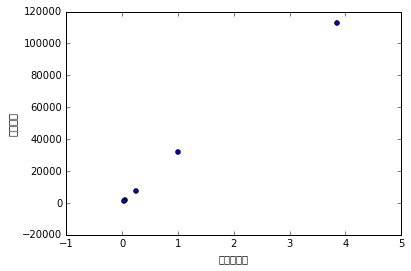

In [264]:
%pylab inline
macIndex.plot(x = '台幣：外幣', y='原始價格', kind='scatter')

### 新增Column（欄位）

In [249]:
macIndex['人均GDP'] = pd.Series({
    '美國': 54596.65,
    '日本': 37389.79,
    '台灣': 45853.74,
    '香港': 54722.12,
    '澳洲': 46433.30
})

In [250]:
macIndex

,原始價格,台幣：外幣,外幣：台幣,實際價格,人均GDP
台灣,31900,1.000000,1.0000,31900.0000,45853.74
日本,112800,3.850597,0.2597,31637.6928,37389.79
澳洲,1549,0.042955,23.2800,36060.7200,46433.30
美國,999,0.030812,32.4550,32422.5450,54596.65
香港,7488,0.245098,4.0800,30551.0400,54722.12


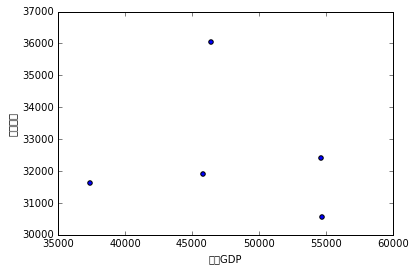

In [251]:
macIndex.plot(x = '人均GDP', y='實際價格', kind='scatter')

## 針對row（列）的操作

In [252]:
macIndex[0:2]

,原始價格,台幣：外幣,外幣：台幣,實際價格,人均GDP
台灣,31900,1.000000,1.0000,31900.0000,45853.74
日本,112800,3.850597,0.2597,31637.6928,37389.79


In [253]:
macIndex.ix['台灣':'日本']

,原始價格,台幣：外幣,外幣：台幣,實際價格,人均GDP
台灣,31900,1.000000,1.0000,31900.0000,45853.74
日本,112800,3.850597,0.2597,31637.6928,37389.79


In [254]:
macIndex.ix[['台灣', '日本']]

,原始價格,台幣：外幣,外幣：台幣,實際價格,人均GDP
台灣,31900,1.000000,1.0000,31900.0000,45853.74
日本,112800,3.850597,0.2597,31637.6928,37389.79


埋伏筆

# 補值
* 補充資料 http://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [322]:
# Import the IPython display module
from IPython.display import IFrame
IFrame('/notebooks/python-course/playground.ipynb', width=900, height=500)

# Dataframe實際演練1
* 將任一csv檔讀到Dataframe中
* 對colomn及row做一些操作
* 試著建立新的column

# Filter
* 先看看資料長什麼樣子

In [307]:
airPollution.head()

,SiteName,County,PSI,MajorPollutant,Status,SO2,CO,O3,PM10,PM2.5,NO2,WindSpeed,WindDirec,FPMI,NOx,NO,PublishTime
0,麥寮,雲林縣,64,懸浮微粒,普通,1.6,0.19,24.0,84,25,6.0,1.8,58,3,8.40,2.37,2015-12-21 01:00
1,關山,臺東縣,18,NaN,良好,1.0,NaN,9.4,16,12,4.6,0.5,318,1,6.12,1.48,2015-12-21 01:00
2,馬公,澎湖縣,35,NaN,良好,1.1,0.18,35.0,34,23,3.6,2.0,68,2,4.26,0.71,2015-12-21 01:00
3,金門,金門縣,64,懸浮微粒,普通,4.6,0.38,9.8,79,40,17.0,0.7,109,3,18.74,1.38,2015-12-21 01:00
4,馬祖,連江縣,0,NaN,NaN,1.4,0.22,22.0,NaN,NaN,7.0,0.5,15,NaN,7.30,0.33,2015-12-21 01:00


## 一個條件的Filter

In [308]:
airPollution[airPollution['SiteName'] == '關山']

,SiteName,County,PSI,MajorPollutant,Status,SO2,CO,O3,PM10,PM2.5,NO2,WindSpeed,WindDirec,FPMI,NOx,NO,PublishTime
1,關山,臺東縣,18,NaN,良好,1,NaN,9.4,16,12,4.6,0.5,318,1,6.12,1.48,2015-12-21 01:00


# 埋伏筆

## 多個條件的Filter

In [301]:
airPollution[(airPollution['SO2'] > 5) | (airPollution['PM2.5'] > 50)].head()

,SiteName,County,PSI,MajorPollutant,Status,SO2,CO,O3,PM10,PM2.5,NO2,WindSpeed,WindDirec,FPMI,NOx,NO,PublishTime
6,復興,高雄市,79,懸浮微粒,普通,3.9,0.81,7.5,110,72,29,1.4,110,9,32.45,3.18,2015-12-21 01:00
7,永和,新北市,60,懸浮微粒,普通,2.9,1.54,2.1,79,55,42,0.7,240,5,77.05,34.67,2015-12-21 01:00
8,竹山,南投縣,86,懸浮微粒,普通,3.1,0.68,7.7,122,84,22,0.8,195,10,23.30,1.09,2015-12-21 01:00
10,三重,新北市,67,懸浮微粒,普通,6.6,2.71,NaN,95,47,51,NaN,NaN,4,167.65,116.61,2015-12-21 01:00
17,潮州,屏東縣,72,懸浮微粒,普通,1.9,0.58,9.0,116,70,19,0.7,44,6,20.57,1.32,2015-12-21 01:00


In [303]:
# Import the IPython display module
from IPython.display import IFrame
IFrame('/notebooks/python-course/playground.ipynb', width=900, height=500)

# 建立索引
* 先看看資料長什麼樣子

In [208]:
airPollution.head()

,SiteName,County,PSI,MajorPollutant,Status,SO2,CO,O3,PM10,PM2.5,NO2,WindSpeed,WindDirec,FPMI,NOx,NO,PublishTime
0,麥寮,雲林縣,64,懸浮微粒,普通,1.6,0.19,24.0,84,25,6.0,1.8,58,3,8.40,2.37,2015-12-21 01:00
1,關山,臺東縣,18,NaN,良好,1.0,NaN,9.4,16,12,4.6,0.5,318,1,6.12,1.48,2015-12-21 01:00
2,馬公,澎湖縣,35,NaN,良好,1.1,0.18,35.0,34,23,3.6,2.0,68,2,4.26,0.71,2015-12-21 01:00
3,金門,金門縣,64,懸浮微粒,普通,4.6,0.38,9.8,79,40,17.0,0.7,109,3,18.74,1.38,2015-12-21 01:00
4,馬祖,連江縣,0,NaN,NaN,1.4,0.22,22.0,NaN,NaN,7.0,0.5,15,NaN,7.30,0.33,2015-12-21 01:00


In [224]:
airPollution = airPollution.set_index('SiteName')

In [225]:
airPollution.head()

,County,PSI,MajorPollutant,Status,SO2,CO,O3,PM10,PM2.5,NO2,WindSpeed,WindDirec,FPMI,NOx,NO,PublishTime
SiteName,,,,,,,,,,,,,,,,
麥寮,雲林縣,64,懸浮微粒,普通,1.6,0.19,24.0,84,25,6.0,1.8,58,3,8.40,2.37,2015-12-21 01:00
關山,臺東縣,18,NaN,良好,1.0,NaN,9.4,16,12,4.6,0.5,318,1,6.12,1.48,2015-12-21 01:00
馬公,澎湖縣,35,NaN,良好,1.1,0.18,35.0,34,23,3.6,2.0,68,2,4.26,0.71,2015-12-21 01:00
金門,金門縣,64,懸浮微粒,普通,4.6,0.38,9.8,79,40,17.0,0.7,109,3,18.74,1.38,2015-12-21 01:00
馬祖,連江縣,0,NaN,NaN,1.4,0.22,22.0,NaN,NaN,7.0,0.5,15,NaN,7.30,0.33,2015-12-21 01:00


In [255]:
airPollution.ix['關山']

County                         臺東縣
PSI                             18
MajorPollutant                 NaN
Status                          良好
SO2                              1
CO                             NaN
O3                             9.4
PM10                            16
PM2.5                           12
NO2                            4.6
WindSpeed                      0.5
WindDirec                      318
FPMI                             1
NOx                           6.12
NO                            1.48
PublishTime       2015-12-21 01:00
Name: 關山, dtype: object

## 親身經驗
* 多想兩分鐘，你可以節省兩天

# Groupby
* 補充資料：http://pandas.pydata.org/pandas-docs/stable/groupby.html

In [285]:
airPollution.groupby('County').mean().head()

,PSI,SO2,CO,O3,PM10,PM2.5,NO2,WindSpeed,WindDirec,FPMI,NOx,NO
County,,,,,,,,,,,,
南投縣,71.666667,3.433333,0.683333,6.033333,96.666667,63.0,23.666667,0.833333,159.333333,7.333333,25.656667,2.110
嘉義市,79.000000,3.700000,0.730000,5.800000,121.000000,54.0,26.000000,2.200000,334.000000,5.000000,26.840000,0.760
嘉義縣,71.000000,2.350000,0.295000,16.500000,74.000000,23.0,10.150000,1.500000,327.000000,3.500000,11.450000,1.360
基隆市,47.000000,4.400000,0.800000,2.800000,56.000000,43.0,38.000000,1.100000,83.000000,3.000000,42.770000,4.630
宜蘭縣,36.500000,3.000000,0.230000,14.000000,36.000000,7.5,7.550000,0.800000,250.000000,1.000000,9.315000,1.785


In [286]:
airPollution.groupby('County').mean()['PM2.5']

County
南投縣    63.000000
嘉義市    54.000000
嘉義縣    23.000000
基隆市    43.000000
宜蘭縣     7.500000
屏東縣    50.000000
彰化縣    23.666667
新北市    46.000000
新竹市    21.000000
新竹縣    28.500000
桃園市    31.500000
澎湖縣    23.000000
臺中市    33.800000
臺北市    39.285714
臺南市    40.000000
臺東縣     7.500000
花蓮縣    13.000000
苗栗縣    35.666667
連江縣          NaN
金門縣    40.000000
雲林縣    28.000000
高雄市    68.166667
Name: PM2.5, dtype: float64

# Sort

In [304]:
airPollution.groupby('County').mean()['PM2.5'].sort_values(ascending=False)

County
高雄市    68.166667
南投縣    63.000000
嘉義市    54.000000
屏東縣    50.000000
新北市    46.000000
基隆市    43.000000
金門縣    40.000000
臺南市    40.000000
臺北市    39.285714
苗栗縣    35.666667
臺中市    33.800000
桃園市    31.500000
新竹縣    28.500000
雲林縣    28.000000
彰化縣    23.666667
澎湖縣    23.000000
嘉義縣    23.000000
新竹市    21.000000
花蓮縣    13.000000
宜蘭縣     7.500000
臺東縣     7.500000
連江縣          NaN
Name: PM2.5, dtype: float64

In [305]:
airPollution.groupby('County').mean().sort_values(by=['PM2.5'], ascending=False).head()

,PSI,SO2,CO,O3,PM10,PM2.5,NO2,WindSpeed,WindDirec,FPMI,NOx,NO
County,,,,,,,,,,,,
高雄市,79.250000,3.691667,0.654167,12.408333,117.833333,68.166667,22.833333,1.200000,121.925000,7.333333,25.410000,2.465833
南投縣,71.666667,3.433333,0.683333,6.033333,96.666667,63.000000,23.666667,0.833333,159.333333,7.333333,25.656667,2.110000
嘉義市,79.000000,3.700000,0.730000,5.800000,121.000000,54.000000,26.000000,2.200000,334.000000,5.000000,26.840000,0.760000
屏東縣,60.333333,1.833333,0.426667,21.000000,82.666667,50.000000,12.933333,2.633333,36.000000,5.000000,14.163333,1.006667
新北市,59.909091,4.000000,1.004545,6.590000,78.000000,46.000000,33.436364,1.288889,226.000000,4.545455,53.244545,19.907273


# 最後想跟大家說的是

In [238]:
t = np.arange(0,2*np.pi, 0.1)

In [239]:
x = 16*np.sin(t)**3

In [240]:
y = 13*np.cos(t)-5*np.cos(2*t)-2*np.cos(3*t)-np.cos(4*t)

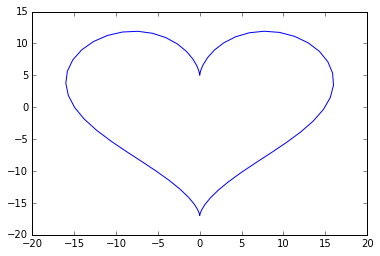

In [242]:
plot(x, y)

<img  src="10672358_838534209504682_6668943752399747165_n.jpg"/>

<img  src="20080321Part05PARTIII01315623-38-30.jpg"/>